In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
loss_in_each_epoch_train = pd.Series(np.full((50), 0.))
loss_in_each_epoch_test = pd.Series(np.full((50), 0.))

In [0]:
accuracy_in_each_epoch_train= pd.Series(np.full((50), 0.))
accuracy_in_each_epoch_test = pd.Series(np.full((50), 0.))

In [16]:
for epoch in range(50):
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          optimizer.zero_grad()

          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          loss_in_each_epoch_train[epoch] += loss.item() 
          if i % 2000 == 1999:    
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0

      correct = 0
      total = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              outputs = net(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
              loss = criterion(outputs, labels)
              loss_in_each_epoch_test[epoch] += loss.item() 
      accuracy_in_each_epoch_test[epoch] = correct / total * 100

      correct = 0
      total = 0
      with torch.no_grad():
          for data in trainloader:
              images, labels = data
              outputs = net(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
      accuracy_in_each_epoch_train[epoch] = correct / total *100
      
print('Finished Training')

[1,  2000] loss: 2.228
[1,  4000] loss: 1.855
[1,  6000] loss: 1.635
[1,  8000] loss: 1.581
[1, 10000] loss: 1.498
[1, 12000] loss: 1.443
[2,  2000] loss: 1.385
[2,  4000] loss: 1.360
[2,  6000] loss: 1.300
[2,  8000] loss: 1.288
[2, 10000] loss: 1.284
[2, 12000] loss: 1.276
[3,  2000] loss: 1.196
[3,  4000] loss: 1.197
[3,  6000] loss: 1.197
[3,  8000] loss: 1.171
[3, 10000] loss: 1.182
[3, 12000] loss: 1.162
[4,  2000] loss: 1.089
[4,  4000] loss: 1.108
[4,  6000] loss: 1.100
[4,  8000] loss: 1.097
[4, 10000] loss: 1.088
[4, 12000] loss: 1.096
[5,  2000] loss: 1.017
[5,  4000] loss: 1.030
[5,  6000] loss: 1.041
[5,  8000] loss: 1.043
[5, 10000] loss: 1.056
[5, 12000] loss: 1.019
[6,  2000] loss: 0.960
[6,  4000] loss: 0.976
[6,  6000] loss: 0.988
[6,  8000] loss: 0.990
[6, 10000] loss: 1.003
[6, 12000] loss: 0.990
[7,  2000] loss: 0.917
[7,  4000] loss: 0.924
[7,  6000] loss: 0.925
[7,  8000] loss: 0.944
[7, 10000] loss: 0.956
[7, 12000] loss: 0.979
[8,  2000] loss: 0.867
[8,  4000] 

In [0]:
n_epoch = pd.Series(np.array(range(1,51)))


Text(0, 0.5, 'ФУНКЦИЯ ПОТЕРЬ')

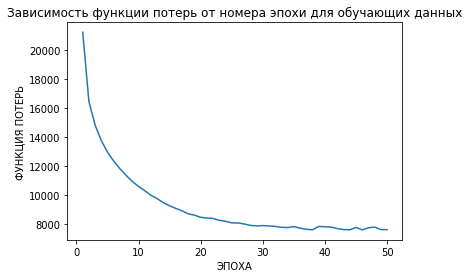

In [18]:
sns.lineplot(n_epoch,loss_in_each_epoch_train)
plt.title("Зависимость функции потерь от номера эпохи для обучающих данных")
plt.xlabel("ЭПОХА")
plt.ylabel("ФУНКЦИЯ ПОТЕРЬ")

Text(0, 0.5, 'ФУНКЦИЯ ПОТЕРЬ')

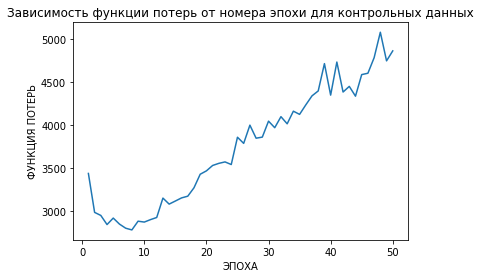

In [19]:
sns.lineplot(n_epoch,loss_in_each_epoch_test)
plt.title("Зависимость функции потерь от номера эпохи для контрольных данных")
plt.xlabel("ЭПОХА")
plt.ylabel("ФУНКЦИЯ ПОТЕРЬ")

Text(0, 0.5, 'ТОЧНОСТЬ')

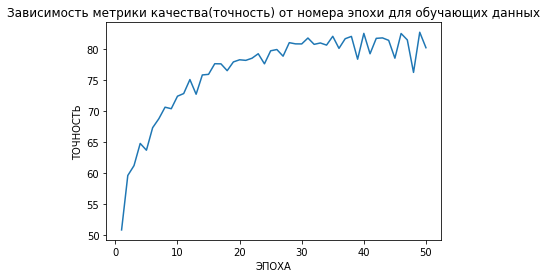

In [20]:
sns.lineplot(n_epoch,accuracy_in_each_epoch_train)
plt.title("Зависимость метрики качества(точность) от номера эпохи для обучающих данных")
plt.xlabel("ЭПОХА")
plt.ylabel("ТОЧНОСТЬ")

Text(0, 0.5, 'ТОЧНОСТЬ')

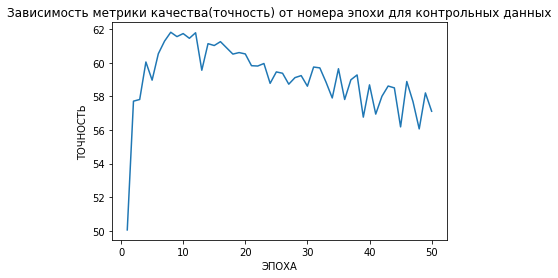

In [21]:
sns.lineplot(n_epoch,accuracy_in_each_epoch_test)
plt.title("Зависимость метрики качества(точность) от номера эпохи для контрольных данных")
plt.xlabel("ЭПОХА")
plt.ylabel("ТОЧНОСТЬ")

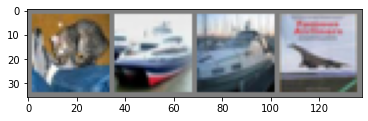

GroundTruth:    cat  ship  ship plane


In [26]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

    
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship truck plane


In [29]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 66 %
Accuracy of  bird : 51 %
Accuracy of   cat : 36 %
Accuracy of  deer : 50 %
Accuracy of   dog : 40 %
Accuracy of  frog : 72 %
Accuracy of horse : 63 %
Accuracy of  ship : 66 %
Accuracy of truck : 66 %
